In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
pio.renderers.default = 'iframe'

# Data cleaning

In [2]:
df = pd.read_csv("../montgomery.csv",low_memory=False)#, parse_dates = ["Crash Date/Time"]).rename(columns = {"Crash Date/Time": "date"})
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("\nDataset Shape (Rows, Columns):", df.shape)
print("\nData preview: ")
df.head()


Dataset Shape (Rows, Columns): (190824, 39)

Data preview: 


,report_number,local_case_number,agency_name,acrs_report_type,crash_date/time,route_type,road_name,cross-street_name,off-road_description,municipality,...,vehicle_going_dir,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,latitude,longitude,location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"


## Feature inspection

In [3]:
df.columns.values

array(['report_number', 'local_case_number', 'agency_name',
       'acrs_report_type', 'crash_date/time', 'route_type', 'road_name',
       'cross-street_name', 'off-road_description', 'municipality',
       'related_non-motorist', 'collision_type', 'weather',
       'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non-motorist_substance_abuse',
       'person_id', 'driver_at_fault', 'injury_severity', 'circumstance',
       'driver_distracted_by', 'drivers_license_state', 'vehicle_id',
       'vehicle_damage_extent', 'vehicle_first_impact_location',
       'vehicle_body_type', 'vehicle_movement', 'vehicle_going_dir',
       'speed_limit', 'driverless_vehicle', 'parked_vehicle',
       'vehicle_year', 'vehicle_make', 'vehicle_model', 'latitude',
       'longitude', 'location'], dtype=object)

Rename crash_date/time column to make preprocessing easier.

In [4]:
df.rename(columns={'crash_date/time': 'date'}, inplace=True)
df.columns.values

array(['report_number', 'local_case_number', 'agency_name',
       'acrs_report_type', 'date', 'route_type', 'road_name',
       'cross-street_name', 'off-road_description', 'municipality',
       'related_non-motorist', 'collision_type', 'weather',
       'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non-motorist_substance_abuse',
       'person_id', 'driver_at_fault', 'injury_severity', 'circumstance',
       'driver_distracted_by', 'drivers_license_state', 'vehicle_id',
       'vehicle_damage_extent', 'vehicle_first_impact_location',
       'vehicle_body_type', 'vehicle_movement', 'vehicle_going_dir',
       'speed_limit', 'driverless_vehicle', 'parked_vehicle',
       'vehicle_year', 'vehicle_make', 'vehicle_model', 'latitude',
       'longitude', 'location'], dtype=object)

## Duplicates

In [5]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


There are several rows with the same Local case number. This is due to one accident involving multiple vehicles.

In [6]:
column_to_check = "local_case_number" 

if column_to_check in df.columns:
    print(f"\n### Checking and Displaying Duplicate Rows Based on '{column_to_check}' ###\n")
    duplicates = df[df.duplicated(subset=[column_to_check], keep=False)].sort_values(by=column_to_check)
    
    if duplicates.empty:
        print(f"No duplicate rows found based on '{column_to_check}'.")
    else:
        print(f"Duplicate rows based on '{column_to_check}':\n")
else:
    print(f"Column '{column_to_check}' not found in the dataset.")

duplicates.head()


### Checking and Displaying Duplicate Rows Based on 'local_case_number' ###

Duplicate rows based on 'local_case_number':



,report_number,local_case_number,agency_name,acrs_report_type,date,route_type,road_name,cross-street_name,off-road_description,municipality,...,vehicle_going_dir,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,latitude,longitude,location
33702,EJ78670006,11032675,Gaithersburg Police Depar,Property Damage Crash,12/28/2016 09:01:00 AM,NaN,NaN,NaN,DRIVEWAY OF WALTER JOHNSON HIGH SCHOOL.,NaN,...,NaN,15,No,Yes,1997,FORD,F250,39.026475,-77.129234,"(39.02647489, -77.12923363)"
11026,EJ78670006,11032675,Gaithersburg Police Depar,Property Damage Crash,12/28/2016 09:01:00 AM,NaN,NaN,NaN,DRIVEWAY OF WALTER JOHNSON HIGH SCHOOL.,NaN,...,East,15,No,No,2005,THOMAS,SCHOOLBUS,39.026475,-77.129234,"(39.02647489, -77.12923363)"
7706,EJ78090040,1230063626,Gaithersburg Police Depar,Property Damage Crash,10/31/2023 03:41:00 PM,NaN,NaN,NaN,"229 KENTLANDS BLVD. GAITHERSBURG, MD. 20878\n(...",NaN,...,East,15,No,No,2009,NISS,4S,39.124979,-77.237916,"(39.12497945, -77.23791584)"
8918,EJ78090040,1230063626,Gaithersburg Police Depar,Property Damage Crash,10/31/2023 03:41:00 PM,NaN,NaN,NaN,"229 KENTLANDS BLVD. GAITHERSBURG, MD. 20878\n(...",NaN,...,South,15,No,No,2021,SUBA,SD,39.124979,-77.237916,"(39.12497945, -77.23791584)"
38187,DD56070011,14002582,Rockville Police Departme,Property Damage Crash,01/16/2015 03:14:00 PM,Maryland (State),ROCKVILLE PIKE,SPUR TO TWINBROOK PKWY,NaN,NaN,...,North,45,No,No,2014,FORD,FUSION,39.058652,-77.121038,"(39.05865167, -77.12103833)"


## Missing values 

In [7]:
# Table of missing values with percentages
print("\n### Missing Values by Column (Count and Percentage) ###\n")
print("Note that there are in total n.rows = ", df.shape[0])

# Calculate missing values count and percentage
missing_values_table = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values_table,
    'Percentage (%)': missing_values_percentage
})

# Sort the table by percentage of missing values (descending order)
missing_summary = missing_summary.sort_values(by='Percentage (%)', ascending=False)

# Display the table
print(missing_summary)


### Missing Values by Column (Count and Percentage) ###

Note that there are in total n.rows =  190824
                               Missing Values  Percentage (%)
non-motorist_substance_abuse           185819       97.377164
related_non-motorist                   184673       96.776611
off-road_description                   173218       90.773697
municipality                           171698       89.977152
circumstance                           154582       81.007630
driver_substance_abuse                  31320       16.413030
cross-street_name                       27658       14.493984
traffic_control                         27097       14.199996
surface_condition                       21860       11.455582
road_name                               19960       10.459900
route_type                              18644        9.770260
weather                                 13356        6.999120
drivers_license_state                   12062        6.321008
vehicle_going_dir           

There is a high percentage of missing values for columns like ```circumstance``` and ```municipality```.

In [8]:
df[["circumstance","surface_condition"]][~df["circumstance"].isna()]

,circumstance,surface_condition
12,"N/A, WET",NaN
16,"ICY OR SNOW-COVERED, N/A",ICE
25,"N/A, WET",WET
29,"N/A, ROAD UNDER CONSTRUCTION/MAINTENANCE",DRY
33,"N/A, WET",WET
...,...,...
190793,Failed to Yield Right-of-Way,Wet
190807,"Followed Too Closely, Operated Motor Vehicle i...",NaN
190808,Failed to Keep in Proper Lane,Wet
190812,"Too Fast For Conditions, Wrong Side",Wet


Drop the columns that have a high percentage of missing values.

In [9]:
columns_to_drop = ["non-motorist_substance_abuse","related_non-motorist","off-road_description", "municipality", "circumstance"]
# Drop the identified columns
df.drop(columns=columns_to_drop, inplace=True)
print("N.of columns: ",df.shape[1])

N.of columns:  34


## Date column
Date column should contain only date time objects and is split in columns:

- year
- month
- day
- time

In [10]:
# Print the DataFrame
print("\n### Converted Date Column ###\n")
print("before:")
print(df["date"].dtypes)
print(df["date"][0])

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

print("\nafter:")
print(df["date"].dtypes)
print(df["date"][0])


### Converted Date Column ###

before:
object
05/27/2021 07:40:00 PM

after:
datetime64[ns]
2021-05-27 19:40:00


In [11]:
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['time'] = df['date'].dt.strftime('%H:%M:%S')

In [12]:
df[["date", "year", "month", "time"]].head()

,date,year,month,time
0,2021-05-27 19:40:00,2021,5,19:40:00
1,2015-09-11 13:29:00,2015,9,13:29:00
2,2018-08-17 14:25:00,2018,8,14:25:00
3,2023-08-11 18:00:00,2023,8,18:00:00
4,2023-12-06 18:42:00,2023,12,18:42:00


Save clean data to CSV.

In [13]:
df.to_csv("../clean_data.csv", index=False)

# Exploratory data analysis

## Baseline definition for data analysis

We can see a clear division between before and after 2020 in terms of number of accidents. Probably due to the pandemic.

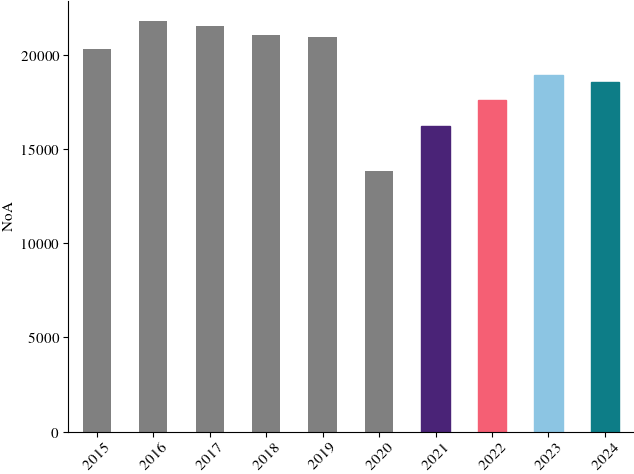

In [14]:
fig, ax = plt.subplots()

df[df["year"] != 2025].groupby("year").size().plot(
    ax=ax,
    kind="bar",
    xlabel="",
    ylabel="NoA",
    rot=45,
    color="gray",
)

for i, color in enumerate(["#4a2377", "#f55f74", "#8cc5e3", "#0d7d87"]):
    ax.get_children()[6 + i].set_color(color)

plt.savefig("../fig/accidents_per_year.pdf")

Similar frequency in terms of NoA depending on the season.

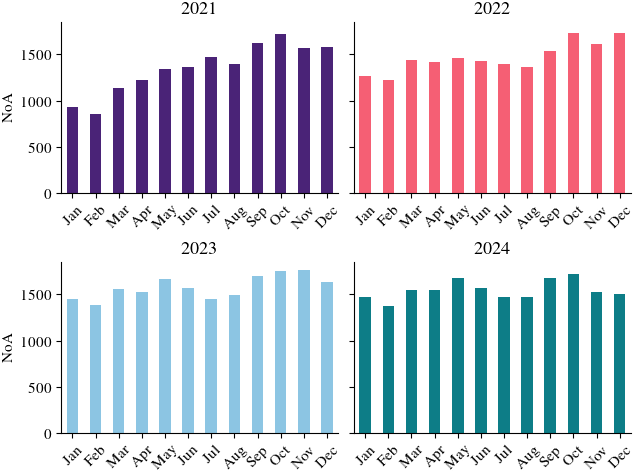

In [15]:
fig, axes = plt.subplots(2, 2, sharey=True, layout="constrained")

years = [2021, 2022, 2023, 2024]

for year, ax, color in zip(years, axes.ravel(), ["#4a2377", "#f55f74", "#8cc5e3", "#0d7d87"]):
    df[df["year"] == year].groupby("month").size().plot(
                ax=ax,
                kind="bar",
                xlabel="",
                ylabel="NoA",
                title=year,
                color=color,
                rot=45,
            )

    ax.set_xticklabels("Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split())

plt.savefig("../fig/accidents_per_month.pdf")

## Impact of driver condition on NoA

**Results from this section were not included in the final report due to the limited page count but were presented to the tutor during one of the meetings*.*

For the data exploration purposes we look at column ```driver_substance_abuse```.

In [16]:
df["driver_substance_abuse"].unique()

array(['NONE DETECTED', 'UNKNOWN', nan, 'ALCOHOL CONTRIBUTED',
       'ALCOHOL PRESENT', 'COMBINATION CONTRIBUTED',
       'COMBINED SUBSTANCE PRESENT', 'ILLEGAL DRUG CONTRIBUTED',
       'ILLEGAL DRUG PRESENT', 'MEDICATION CONTRIBUTED',
       'MEDICATION PRESENT', 'OTHER', 'Unknown, Unknown',
       'Not Suspect of Alcohol Use, Not Suspect of Drug Use',
       'Suspect of Alcohol Use, Not Suspect of Drug Use',
       'Suspect of Alcohol Use, Unknown',
       'Not Suspect of Alcohol Use, Suspect of Drug Use',
       'Unknown, Not Suspect of Drug Use',
       'Suspect of Alcohol Use, Suspect of Drug Use',
       'Not Suspect of Alcohol Use, Unknown',
       'Unknown, Suspect of Drug Use'], dtype=object)

We standardize the column values for better data visualization

In [17]:
df["driver_substance_abuse"]=df["driver_substance_abuse"].fillna('unknown')

In [18]:
df["driver_substance_abuse"] = df["driver_substance_abuse"].replace(["UNKNOWN", "Unknown, Unknown", "Unknown, Not Suspect of Drug Use", "Not Suspect of Alcohol Use, Unknown"], 'unknown')
df["driver_substance_abuse"] = df["driver_substance_abuse"].replace(["MEDICATION PRESENT", "MEDICATION CONTRIBUTED"], 'medications')
df["driver_substance_abuse"] = df["driver_substance_abuse"].replace(["ALCOHOL PRESENT", "ALCOHOL CONTRIBUTED","Suspect of Alcohol Use, Suspect of Drug Use"], 'alcohol')
df["driver_substance_abuse"] = df["driver_substance_abuse"].replace(["ILLEGAL DRUG CONTRIBUTED", "ILLEGAL DRUG PRESENT"], 'illegal drugs')
df["driver_substance_abuse"] = df["driver_substance_abuse"].replace(["Not Suspect of Alcohol Use, Not Suspect of Drug Use", "OTHER"], 'other')
df["driver_substance_abuse"] = df["driver_substance_abuse"].replace(["COMBINATION CONTRIBUTED", "COMBINED SUBSTANCE PRESENT"], 'combination of substances')
df["driver_substance_abuse"] = df["driver_substance_abuse"].replace(["Suspect of Alcohol Use, Unknown", "Suspect of Alcohol Use, Not Suspect of Drug Use"], 'suspect of alcohol')
df["driver_substance_abuse"] = df["driver_substance_abuse"].replace(["Not Suspect of Alcohol Use, Suspect of Drug Use", "Unknown, Suspect of Drug Use"], 'suspect of drug')
df["driver_substance_abuse"] = df["driver_substance_abuse"].replace(["NONE DETECTED"], 'none')
df['driver_substance_abuse'] = df['driver_substance_abuse'].str.lower()
df["driver_substance_abuse"].unique()

array(['none', 'unknown', 'alcohol', 'combination of substances',
       'illegal drugs', 'medications', 'other', 'suspect of alcohol',
       'suspect of drug'], dtype=object)

In [19]:
# Calculate the number of rows where column A has the value 'OTHER'
count_susp_drug = (df['driver_substance_abuse'] == 'suspect of alcohol').sum()
count_susp_alcohol = (df['driver_substance_abuse'] == 'suspect of drug').sum()

# Calculate the percentage
percentage_al = (count_susp_alcohol / df.shape[0]) * 100
percentage_drug = (count_susp_drug / df.shape[0]) * 100

# Print the result
print(f"'suspect of alcohol': {percentage_al:.2f}%")
print(f"'suspect of drug': {percentage_drug:.2f}%")
#df[df["driver_substance_abuse"]=="suspect of drug"]

'suspect of alcohol': 0.01%
'suspect of drug': 0.28%


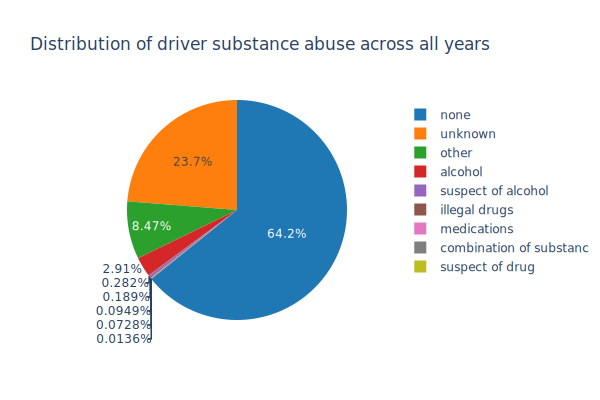

In [20]:
# Count the occurrences of each unique value in the 'driver_substance_abuse' column
count_values = df['driver_substance_abuse'].value_counts()

fig = px.pie(
    names=count_values.index,
    values=count_values.values,
    color=count_values.index,
    color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'],
    title="Distribution of driver substance abuse across all years",
    labels={'value': 'Count', 'driver_substance_abuse': 'Substance Abuse Category'},
    width=600,
    height=400
)

fig.show("svg")

We can see that alcohol was registered as cause of accident for only 3% of the cases across all years (2015-2024).

If we take a closer look at November 2022, we observe that substance abuse is not the main cause of accidents.

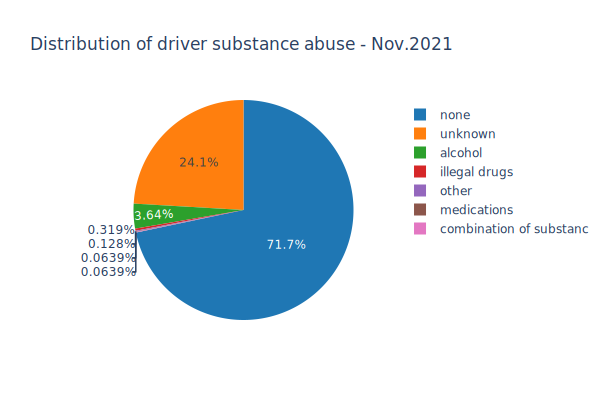

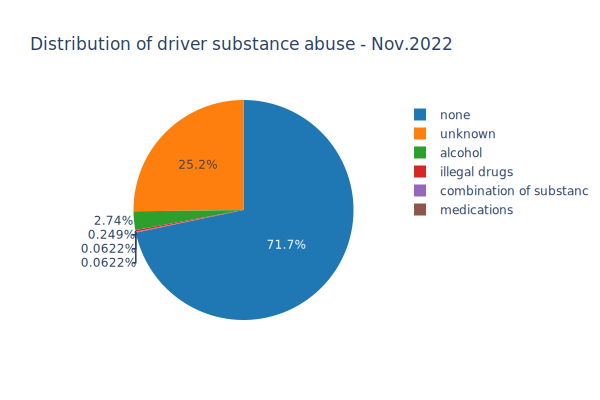

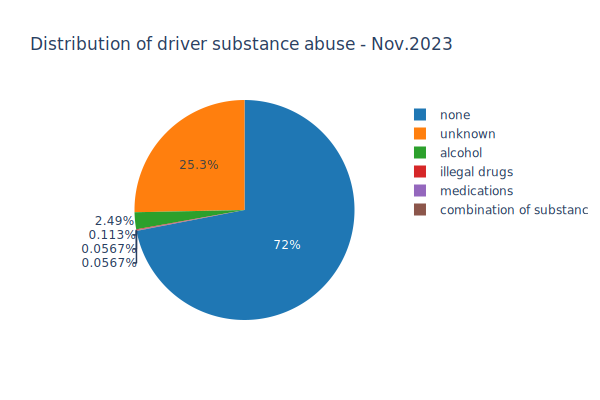

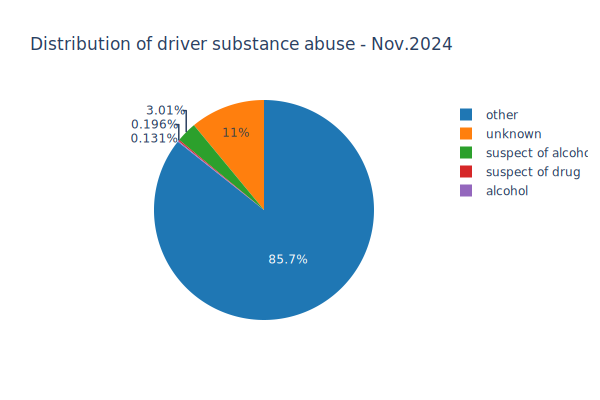

In [21]:
for year in [2021, 2022, 2023, 2024]:
    date_selected = df[(df["date"].dt.year == year) & (df["date"].dt.month == 11)].reset_index(drop=True)
    count_values = date_selected['driver_substance_abuse'].value_counts()

    fig = px.pie(
        names=count_values.index,
        values=count_values.values,
        color=count_values.index,
        color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'],
        title="Distribution of driver substance abuse - Nov."+str(year),
        labels={'value': 'Count', 'driver_substance_abuse': 'Substance Abuse Category'},
        width=600,
        height=400
    )

    fig.show("svg")

# Accident patterns in the month of Thanksgiving

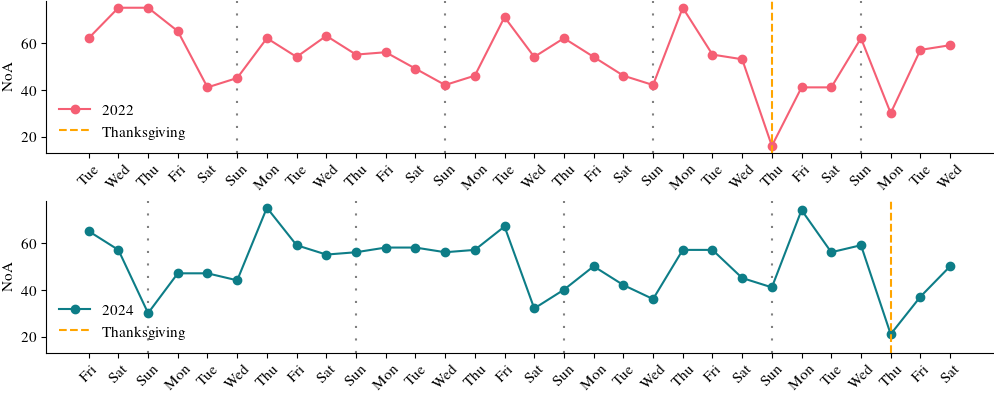

In [22]:
fig, axes = plt.subplots(2, 1, sharey=True, figsize=(10, 4))

# Mark Sundays in 2022
for sunday in [6, 13, 20, 27]:
    axes[0].axvline(x=sunday, linestyle=(0, (1, 5)), color="gray")

# Mark Sundays in 2024
for sunday in [3, 10, 17, 24]:
    axes[1].axvline(x=sunday, linestyle=(0, (1, 5)), color="gray")

df[(df["year"] == 2022) & (df["month"] == 11)].groupby("day").size().plot(
    ax=axes[0],
    kind="line",
    xticks=np.arange(1,31),
    xlabel="",
    ylabel="NoA",
    rot=45,
    marker="o",
    color="#f55f74",
    label="2022",
)

axes[0].set_xticklabels(["Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "Mon"] * 4 + ["Tue", "Wed"])
axes[0].axvline(x=24, linestyle="--", color="orange", label="Thanksgiving")
axes[0].legend(loc="lower left")

df[(df["year"] == 2024) & (df["month"] == 11)].groupby("day").size().plot(
    ax=axes[1],
    kind="line",
    xticks=np.arange(1,31),
    xlabel="",
    ylabel="NoA",
    rot=45,
    marker="o",
    color="#0d7d87",
    label="2024",
)

axes[1].set_xticklabels(["Fri", "Sat", "Sun", "Mon", "Tue", "Wed", "Thu"] * 4 + ["Fri", "Sat"])
axes[1].axvline(x=28, linestyle="--", color="orange", label="Thanksgiving")
axes[1].legend(loc="lower left")

plt.savefig("../fig/accidents_per_day.pdf")

# Accident patterns on the days of the week

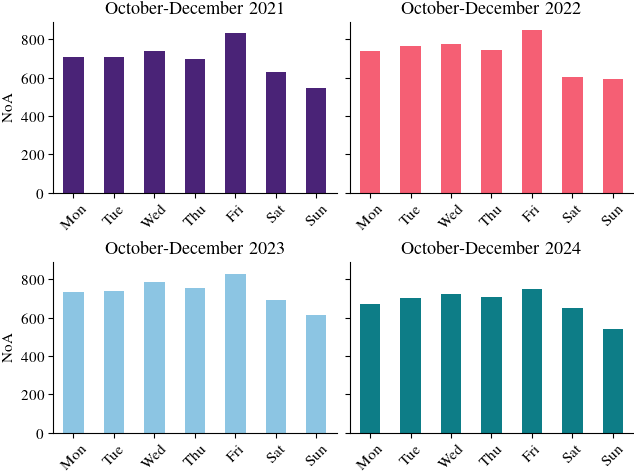

In [23]:
fig, axes = plt.subplots(2, 2, sharey=True)

years = [2021, 2022, 2023, 2024]

colors = ["#4a2377", "#f55f74", "#8cc5e3", "#0d7d87"]

for year, ax, color in zip(years, axes.ravel(), colors):
    df[(df["year"] == year) & df["month"].isin([10, 11, 12])].groupby(df["date"].dt.dayofweek).size().plot(
                ax=ax,
                kind="bar",
                title=f"October-December {year}",
                xlabel="",
                ylabel="NoA",
                rot=45,
                color=color,
            )
    ax.set_xticklabels("Mon Tue Wed Thu Fri Sat Sun".split())

plt.savefig("../fig/accidents_per_day_of_week.pdf")

# Statistical model

In [24]:
years = [2021, 2022, 2023, 2024]

thanksgiving_dates = [
    dt.date(2015, 11, 26),
    dt.date(2016, 11, 25),
    dt.date(2017, 11, 23),
    dt.date(2018, 11, 22),
    dt.date(2019, 11, 28),
    dt.date(2020, 11, 26),
    dt.date(2021, 11, 25),
    dt.date(2022, 11, 24),
    dt.date(2023, 11, 23),
    dt.date(2024, 11, 28),
]

blacklisted_dates = [(10, 14), (12, 25), (12, 31)]

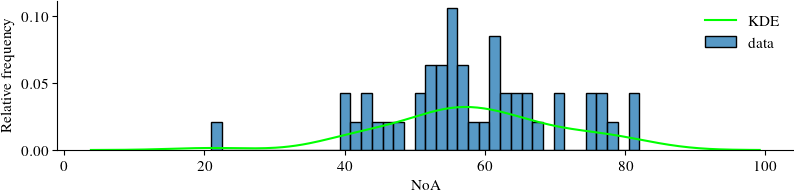

In [25]:
select_thursdays = df[
        df["year"].isin(years)
        & df["month"].isin([10, 11, 12])
        & (df["date"].dt.dayofweek == 3)
        & ~(df["date"].dt.date.isin(thanksgiving_dates))
        & ~(df[["month", "day"]].apply(tuple, axis=1).isin(blacklisted_dates))
]

fig, ax = plt.subplots(figsize=(8, 2))

baseline = select_thursdays.groupby(select_thursdays["date"].dt.date).size()

sns.histplot(data=baseline, label="data", kde=False, bins=40, stat="probability", ax=ax)
sns.kdeplot(data=baseline, label="KDE", color="lime", ax=ax)

ax.set(ylabel="Relative frequency", xlabel="NoA")
ax.legend()
plt.savefig("../fig/accidents_on_thursdays.pdf")

# Testing of hypotheses and results

### Hypothesis 1
$H_1$: NoA on Thanksgiving is lower compared to usual days.

In [26]:
select_thursdays = df[
        df["year"].isin(years)
        & df["month"].isin([10, 11, 12])
        & (df["date"].dt.dayofweek == 3)
        & ~(df["date"].dt.date.isin(thanksgiving_dates))
        & ~(df[["month", "day"]].apply(tuple, axis=1).isin(blacklisted_dates))
]

baseline = select_thursdays.groupby(select_thursdays["date"].dt.date).size()

samples = [
        df[df["date"].dt.date == date]
        .groupby("day").size().sum()
        for date in thanksgiving_dates[-4:]
]

# Perform Mann-Whitney U test using the baseline data
U_stat, p_value = stats.mannwhitneyu(samples, baseline.values, alternative="less")
print(f"Results for Mann-Whitney U test: U = {U_stat}, p-value = {p_value}")

Results for Mann-Whitney U test: U = 2.5, p-value = 0.0007107128042474335


### Hypothesis 2
$H_1$: NoA on Monday before Thanksgiving is greater compared to usual days.

In [27]:
select_mondays = df[
        df["year"].isin(years)
        & df["month"].isin([10, 11, 12])
        & (df["date"].dt.dayofweek == 0)
        & ~(df["date"].dt.date.isin(date - dt.timedelta(days=3) for date in thanksgiving_dates))
        & ~(df[["month", "day"]].apply(tuple, axis=1).isin(blacklisted_dates))
]

baseline = select_mondays.groupby(select_mondays["date"].dt.date).size()

samples = [
        df[df["date"].dt.date == date - dt.timedelta(days=3)]
        .groupby("day").size().sum()
        for date in thanksgiving_dates[-4:]
]

# Perform Mann-Whitney U test using the baseline data
U_stat, p_value = stats.mannwhitneyu(samples, baseline.values, alternative="greater")
print(f"Results for Mann-Whitney U test: U = {U_stat}, p-value = {p_value}")

Results for Mann-Whitney U test: U = 155.0, p-value = 0.012654258985174471


### Hypothesis 3
$H_1$: NoA on Tuesday before Thanksgiving is greater compared to usual days.

In [28]:
select_tuesdays = df[
        df["year"].isin(years)
        & df["month"].isin([10, 11, 12])
        & (df["date"].dt.dayofweek == 1)
        & ~(df["date"].dt.date.isin(date - dt.timedelta(days=2) for date in thanksgiving_dates))
        & ~(df[["month", "day"]].apply(tuple, axis=1).isin(blacklisted_dates))
]

baseline = select_tuesdays.groupby(select_tuesdays["date"].dt.date).size()

samples = [
        df[df["date"].dt.date == date - dt.timedelta(days=2)]
        .groupby("day").size().sum()
        for date in thanksgiving_dates[-4:]
]

# Perform Mann-Whitney U test using the baseline data
U_stat, p_value = stats.mannwhitneyu(samples, baseline.values, alternative="greater")
print(f"Results for Mann-Whitney U test: U = {U_stat}, p-value = {p_value}")

Results for Mann-Whitney U test: U = 142.5, p-value = 0.05682729434779858


### Hypothesis 4
$H_1$: NoA on Wednesday before Thanksgiving is greater compared to usual days.

In [29]:
select_wednesdays = df[
        df["year"].isin(years)
        & df["month"].isin([10, 11, 12])
        & (df["date"].dt.dayofweek == 2)
        & ~(df["date"].dt.date.isin(date - dt.timedelta(days=1) for date in thanksgiving_dates))
        & ~(df[["month", "day"]].apply(tuple, axis=1).isin(blacklisted_dates))
]

baseline = select_wednesdays.groupby(select_wednesdays["date"].dt.date).size()

samples = [
        df[df["date"].dt.date == date - dt.timedelta(days=1)]
        .groupby("day").size().sum()
        for date in thanksgiving_dates[-4:]
]

# Perform Mann-Whitney U test using the baseline data
U_stat, p_value = stats.mannwhitneyu(samples, baseline.values, alternative="less")
print(f"Results for Mann-Whitney U test: U = {U_stat}, p-value = {p_value}")

Results for Mann-Whitney U test: U = 100.5, p-value = 0.5969587028859101


### Hypothesis 5
$H_1$: Aggregated NoA on Monday, Tuesday and Wednesday before Thanksgiving is greater compared to usual days.

In [30]:
select_days = df[
        df["year"].isin(years)
        & df["month"].isin([10, 11, 12])
        # Select Monday, Tuesday and Wednesday
        & (df["date"].dt.dayofweek.isin([0, 1, 2]))
        # Exclude dates from testing sample
        & ~(df["date"].dt.date.isin(np.array([[date - dt.timedelta(days=d) for date in thanksgiving_dates] for d in [1, 2, 3]]).ravel()))
        # Exclude blacklisted dates
        & ~(df[["month", "day"]].apply(tuple, axis=1).isin(blacklisted_dates))
].copy()

select_days["week"] = select_days["date"].dt.isocalendar().week
baseline = select_days.groupby(["year", "week"]).size()

samples = [
        df[
            df["date"].dt.date.isin([date - dt.timedelta(days=d) for d in [1, 2, 3]])
        ]
        .groupby(df["date"].dt.isocalendar().week).size().sum()
        for date in thanksgiving_dates[-4:]
]

# Perform Mann-Whitney U test using the baseline data
U_stat, p_value = stats.mannwhitneyu(samples, baseline.values, alternative="greater")
print(f"Results for Mann-Whitney U test: U = {U_stat}, p-value = {p_value}")

Results for Mann-Whitney U test: U = 172.0, p-value = 0.006656719384129764
